# Project Stage 1

Name: Jing Tian [1 point]


**Comments in stage-1:** Your title is house prices while the project is about Titanic.

# Topic: Titanic 

A. Problem Introduction: [5 points]
1. Problem formulation: 
2. Data population: 

Answer:
1. The problem is to study the passengers' lives of the Titanic shipwreck on April 15, 1912. Given some information of 891 passengers and the result of whether they survived or not, we need to predict whether the other 418 passengers on board survived. 
2. Data population: 891 passengers of the Titanic shipwreck whose life status has been known, and 418 passengers that we don't know if they survived in the Titanic shipwreck


B. Data [38 points]
1. Kaggle account: 
2. Show the data
3. Data Wrangling
4. Is the data obtained representative for the problem according to your data population? What kind of assumptions are needed that the analysis using the current data can solve the problem?
5. Guess what kind of sampling method maybe used during the data collection and why do you guess so? 



Answer:
1. jingtc20
2. See below
3. See below
4. a. After the data analysis, I think the data is representative for the problem, since the scope of the age, SibSp, Parch is bigger enough and the data distribution is reasonable, such as Pclass and Sex.
b. Assumptions: All the information in the data is real and correct.
5. I guess stratified sampling was used during the data collection, since we have three classes in the train/test data: first, second and third class.

2. Show the data

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [526]:
# show the shape of train data and several lines
df_train = pd.read_csv('/content/train.csv')
print('Shape of train data', df_train.shape)
df_train.head()

Shape of train data (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [527]:
# check if the train data has duplicates
df_train[df_train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [528]:
# show the information of the train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [529]:
# show the shape of test data and several lines
df_test = pd.read_csv('/content/test.csv')
print('Shape of test data', df_test.shape)
df_test.head()

Shape of test data (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [530]:
# check if the train data has duplicates
df_test[df_test.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [531]:
# show the information of the test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


3. Data Wrangling

3.1 Structure: 
The train dataset and test dataset are all tabular data. For train dataset, we have 891 rows and 12 columns. For test dataset, we have 418 rows and 11 columns. The column names in test data and train data are same except that train data has “ground truth” for each passenger which is called "Survived" and test data doesn't.

In [532]:
print('Shape of train data', df_train.shape)
print('Shape of test data', df_test.shape)

Shape of train data (891, 12)
Shape of test data (418, 11)


In [533]:
print('Shape of train data', df_train.columns)
print('Shape of train data', df_test.columns)

Shape of train data Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Shape of train data Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


3.2 Granularity:
Either in the train data or test data, each record represents a single passenger in the Titanic shipwreck. We can further analyze the data by 'Pclass', 'Survived', or 'Sex'.

In [534]:
df_train_pclass = df_train.groupby('Pclass').size().reset_index(name='Num')
df_train_pclass['ticket_class'] = ['first', 'second', 'third']
df_train_pclass

,Pclass,Num,ticket_class
0,1,216,first
1,2,184,second
2,3,491,third


In [535]:
df_train_gender = df_train.groupby('Sex').size().reset_index(name='Num')
df_train_gender

,Sex,Num
0,female,314
1,male,577


In [536]:
df_train_survived = df_train.groupby('Survived').size().reset_index(name='Num')
df_train_survived['result'] = ['dead', 'alive']
df_train_survived

,Survived,Num,result
0,0,549,dead
1,1,342,alive


In [537]:
df_train_pclass['Num'].tolist()

[216, 184, 491]

Text(0.5, 1.0, 'Analysis of Train Data by Survived')

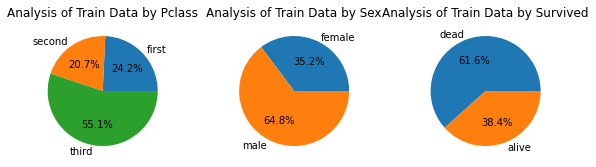

In [538]:
# Data analysis in train data
fig, axs = plt.subplots(1, 3, figsize=(8,8))
fig.tight_layout(w_pad=2.0)

axs[0].pie(df_train_pclass['Num'].tolist(), labels=df_train_pclass['ticket_class'], autopct='%1.1f%%')
axs[0].set_title('Analysis of Train Data by Pclass') 

axs[1].pie(df_train_gender['Num'].tolist(), labels=df_train_gender['Sex'], autopct='%1.1f%%')
axs[1].set_title('Analysis of Train Data by Sex') 

axs[2].pie(df_train_survived['Num'].tolist(), labels=df_train_survived['result'], autopct='%1.1f%%')
axs[2].set_title('Analysis of Train Data by Survived') 

In [539]:
df_test_pclass = df_test.groupby('Pclass').size().reset_index(name='Num')
df_test_pclass['ticket_class'] = ['first', 'second', 'third']
df_test_pclass

,Pclass,Num,ticket_class
0,1,107,first
1,2,93,second
2,3,218,third


In [540]:
df_test_gender = df_test.groupby('Sex').size().reset_index(name='Num')
df_test_gender

,Sex,Num
0,female,152
1,male,266


Text(0.5, 1.0, 'Analysis of Test Data by Sex')

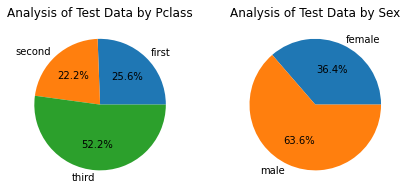

In [541]:
# Data analysis in test data
fig, axs = plt.subplots(1, 2, figsize=(6,6))
fig.tight_layout(w_pad=2.0)

axs[0].pie(df_test_pclass['Num'].tolist(), labels=df_test_pclass['ticket_class'], autopct='%1.1f%%')
axs[0].set_title('Analysis of Test Data by Pclass') 

axs[1].pie(df_test_gender['Num'].tolist(), labels=df_test_gender['Sex'], autopct='%1.1f%%')
axs[1].set_title('Analysis of Test Data by Sex') 

3.3 Scope:
In general, larger scope is more useful than smaller scope since we can filter larger scope down to a smaller scope but often can't go from smaller scope to larger scope. For the train data, the scope of age, fare, sibsp, and parch are 79.58, 512.33, 8, 6 respectively. For the test data, the scope of age, fare, sibsp, and parch are 75.83, 512.33, 8, 9 respectively.

In [542]:
# scope analysis of train data
print('Scope of Age: ', df_train['Age'].max() - df_train['Age'].min())
print('Scope of Fare: ', df_train['Fare'].max() - df_train['Fare'].min())
print('Scope of SibSp: ', df_train['SibSp'].max() - df_train['SibSp'].min())
print('Scope of Parch: ', df_train['Parch'].max() - df_train['Parch'].min())

Scope of Age:  79.58
Scope of Fare:  512.3292
Scope of SibSp:  8
Scope of Parch:  6


Text(0.5, 1.0, 'Analysis of Test Data by Parch')

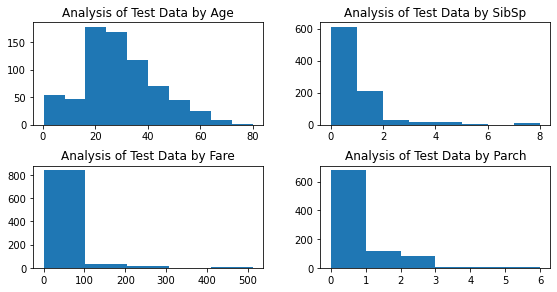

In [543]:
# Data analysis in train data
fig, axs = plt.subplots(2, 2, figsize=(8,4))
fig.tight_layout(w_pad=2.0, h_pad = 2.0)

axs[0, 0].hist(df_train['Age'], bins=10)
axs[0, 0].set_title('Analysis of Test Data by Age') 

axs[1, 0].hist(df_train['Fare'], bins=5)
axs[1, 0].set_title('Analysis of Test Data by Fare') 

axs[0, 1].hist(df_train['SibSp'], bins=8)
axs[0, 1].set_title('Analysis of Test Data by SibSp') 

axs[1, 1].hist(df_train['Parch'], bins=6)
axs[1, 1].set_title('Analysis of Test Data by Parch') 

In [544]:
# scope analysis of test data
print('Scope of Age: ', df_test['Age'].max() - df_test['Age'].min())
print('Scope of Fare: ', df_test['Fare'].max() - df_test['Fare'].min())
print('Scope of SibSp: ', df_test['SibSp'].max() - df_test['SibSp'].min())
print('Scope of Parch: ', df_test['Parch'].max() - df_test['Parch'].min())

Scope of Age:  75.83
Scope of Fare:  512.3292
Scope of SibSp:  8
Scope of Parch:  9


Text(0.5, 1.0, 'Analysis of Test Data by Parch')

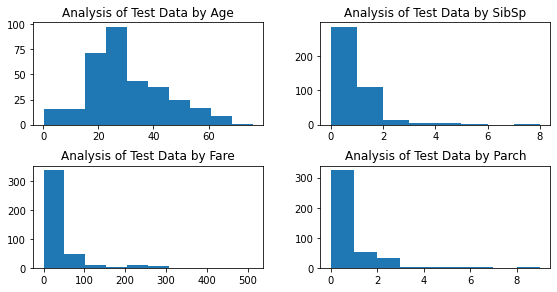

In [545]:
# Data analysis in test data
fig, axs = plt.subplots(2, 2, figsize=(8,4))
fig.tight_layout(w_pad=2.0, h_pad = 2.0)

axs[0, 0].hist(df_test['Age'], bins=10)
axs[0, 0].set_title('Analysis of Test Data by Age') 

axs[1, 0].hist(df_test['Fare'], bins=10)
# axs[1, 0].set_xticks(list(range(0, 600, 60)))
axs[1, 0].set_title('Analysis of Test Data by Fare') 

axs[0, 1].hist(df_test['SibSp'], bins=8)
axs[0, 1].set_title('Analysis of Test Data by SibSp') 

axs[1, 1].hist(df_test['Parch'], bins=9)
axs[1, 1].set_title('Analysis of Test Data by Parch') 

3.4 Temporality: 
Temporality refers to how the data are situated in time and specifically to the date and time fields in the dataset. Since all the data don't include any information related to time, I think this property cannot be identified in this problem.

3.5 Faithfulness:
Combining the analysis of train data and test data, the scope of age is [0.17,80], the scope of fare is [0,512.33], the scope of sibsp is [0,8], and the scope of parch is [0,9]. It seems like reasonable and credible.

In [546]:
# range of train data
print('Range of Age: ', df_train['Age'].min(), "-", df_train['Age'].max())
print('Range of Fare: ', df_train['Fare'].min(), "-",  df_train['Fare'].max())
print('Range of SibSp: ', df_train['SibSp'].min(), "-",  df_train['SibSp'].max())
print('Range of Parch: ', df_train['Parch'].min(), "-",  df_train['Parch'].max())

Range of Age:  0.42 - 80.0
Range of Fare:  0.0 - 512.3292
Range of SibSp:  0 - 8
Range of Parch:  0 - 6


In [547]:
# range of test data
print('Range of Age: ', df_test['Age'].min(), "-", df_test['Age'].max())
print('Range of Fare: ', df_test['Fare'].min(), "-",  df_test['Fare'].max())
print('Range of SibSp: ', df_test['SibSp'].min(), "-",  df_test['SibSp'].max())
print('Range of Parch: ', df_test['Parch'].min(), "-",  df_test['Parch'].max())

Range of Age:  0.17 - 76.0
Range of Fare:  0.0 - 512.3292
Range of SibSp:  0 - 8
Range of Parch:  0 - 9


# Project Stage 2

**Note:** I used this work as reference: https://www.kaggle.com/brendan45774/titanic-top-solution. I didn't copy any code from him, and just looked at his idea. I learned two idea from his work: one is to combine `SibSp` and `Parch` together to create a new variable called `Relative`, the other is to fill missing values in `Age` with random values generated by normal distribution.

**The problem in Stage 1 has been addressed, please see the following graph:**

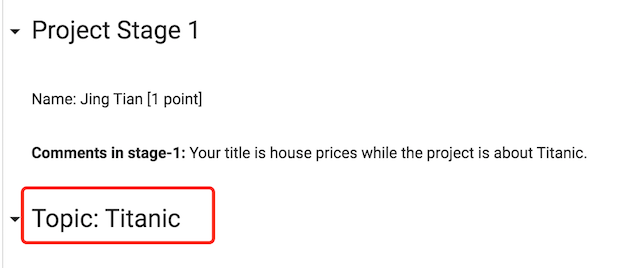

# Data Transformation and EDA

**Describe the transformations of the data you have applied if applicable. Why or Why not? [10 points]** 

Since the `Sex` is categorical data which we can not operate directly with, we need to convert them to numerical form before using them. For train and test data, we can replace `Sex` with numerical data which 0 means male and 1 means female. Besides, we can combine `SibSp` and `Parch` to create a new variable called `Relative`. In the end, we need to fill missing values of age in both train and test data, and then do data normalization on the train and test data.

In [548]:
# head of the train data before data transformation
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [549]:
# Create a new dataframe after converting `sex` to numbers, and drop other unnecessary information
# fill missing data of age by ramdom value generated by normal distribution in train data
df_train_processed = df_train.replace({"Sex": {"male":0,"female":1}})
df_train_processed["Age"].fillna(np.random.normal(df_train["Age"].mean(), df_train["Age"].std()), inplace =True)
df_train_processed['Relative'] = df_train['SibSp'] + df_train['Parch']
df_train_processed.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1,inplace=True)

# creata a new column `data` by combining all the normalized data into a list
df_train_processed['data'] = df_train_processed.apply(
    lambda x: list([x['Pclass'], x['Sex'], x['Age'], x['Fare'], x['Relative']]), axis=1)
df_train_processed.head()

,Survived,Pclass,Sex,Age,Fare,Relative,data
0,0,3,0,22.0,7.2500,1,"[3.0, 0.0, 22.0, 7.25, 1.0]"
1,1,1,1,38.0,71.2833,1,"[1.0, 1.0, 38.0, 71.2833, 1.0]"
2,1,3,1,26.0,7.9250,0,"[3.0, 1.0, 26.0, 7.925, 0.0]"
3,1,1,1,35.0,53.1000,1,"[1.0, 1.0, 35.0, 53.1, 1.0]"
4,0,3,0,35.0,8.0500,0,"[3.0, 0.0, 35.0, 8.05, 0.0]"


In [550]:
# after fill missing values in `Age`, there is no nan value anymore
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Relative  891 non-null    int64  
 6   data      891 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [551]:
# do data normalization with all five features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data = df_train_processed['data'].tolist()
sc.fit(train_data)
train_data = sc.transform(train_data)
df_train_processed['data'] = train_data.tolist()
df_train_processed.head()


,Survived,Pclass,Sex,Age,Fare,Relative,data
0,0,3,0,22.0,7.2500,1,"[0.8273772438659676, -0.7376951317802897, -0.7..."
1,1,1,1,38.0,71.2833,1,"[-1.5661069258891531, 1.3555735383351184, 0.41..."
2,1,3,1,26.0,7.9250,0,"[0.8273772438659676, 1.3555735383351184, -0.44..."
3,1,1,1,35.0,53.1000,1,"[-1.5661069258891531, 1.3555735383351184, 0.20..."
4,0,3,0,35.0,8.0500,0,"[0.8273772438659676, -0.7376951317802897, 0.20..."


In [552]:
# head of the tese data before data transformation
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [553]:
# Create a new dataframe after converting `sex` to numbers, and drop other unnecessary information
# fill the missing valus in `Fare` with random value
# fill missing data of age by ramdom value generated by normal distribution in test data
df_test_processed = df_test.replace({"Sex": {"male":0,"female":1}})
df_test_processed["Age"].fillna(np.random.normal(df_test["Age"].mean(), df_test["Age"].std()), inplace =True)
df_test_processed['Relative'] = df_test['SibSp'] + df_test['Parch']
df_test_processed.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1,inplace=True)
df_test_processed["Fare"].fillna(np.random.normal(df_test["Fare"].mean(), df_test["Fare"].std()), inplace =True)

# creata a new column `data` by combining all the normalized data into a list
df_test_processed['data'] = df_test_processed.apply(
    lambda x: list([x['Pclass'], x['Sex'], x['Age'], x['Fare'], x['Relative']]), axis=1)
df_test_processed.head()

,PassengerId,Pclass,Sex,Age,Fare,Relative,data
0,892,3,0,34.5,7.8292,0,"[3.0, 0.0, 34.5, 7.8292, 0.0]"
1,893,3,1,47.0,7.0000,1,"[3.0, 1.0, 47.0, 7.0, 1.0]"
2,894,2,0,62.0,9.6875,0,"[2.0, 0.0, 62.0, 9.6875, 0.0]"
3,895,3,0,27.0,8.6625,0,"[3.0, 0.0, 27.0, 8.6625, 0.0]"
4,896,3,1,22.0,12.2875,2,"[3.0, 1.0, 22.0, 12.2875, 2.0]"


In [554]:
# do data normalization with all five features
df_test_processed['PassengerId'] = df_test['PassengerId']
test_data = df_test_processed['data'].tolist()
test_data = sc.transform(test_data)
df_test_processed['data'] = test_data.tolist()
df_test_processed.head()

,PassengerId,Pclass,Sex,Age,Fare,Relative,data
0,892,3,0,34.5,7.8292,0,"[0.8273772438659676, -0.7376951317802897, 0.16..."
1,893,3,1,47.0,7.0000,1,"[0.8273772438659676, 1.3555735383351184, 1.063..."
2,894,2,0,62.0,9.6875,0,"[-0.3693648410115927, -0.7376951317802897, 2.1..."
3,895,3,0,27.0,8.6625,0,"[0.8273772438659676, -0.7376951317802897, -0.3..."
4,896,3,1,22.0,12.2875,2,"[0.8273772438659676, 1.3555735383351184, -0.73..."


**What are the features you choose to use for modeling? Why? Note: You may use EDA to show the reason. [10 points]**

I will use five features: `Pclass`, `Sex`, `Age`, `Fare`, and `Relative` in the train data, since they don't have any missing values. From the graph below, we can see that among all the alive passengers, the number of female is greater than number of male. Among all the dead passengers, the number of male is greater than that of female, the number of 3rd class is greater than that of 1st and 2nd class, the number of lower fare is greater than that of higher fare, the number of lower relatives is greater than that of higher relatives, the number of younger people is smaller than the number of older people. So I guess these five features will have a impact on the result. Besides, after doing data transformation to `Sex`, all these features are numerical data. Even if `PassengerId`, `Name`, and `Ticket` don't have any missing values either, they don't have much meaning. Therefore, I will use the above five features and use `Survived` as the result to do data analysis.

In [555]:
# look at the information of the train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Sex in dead passengers')

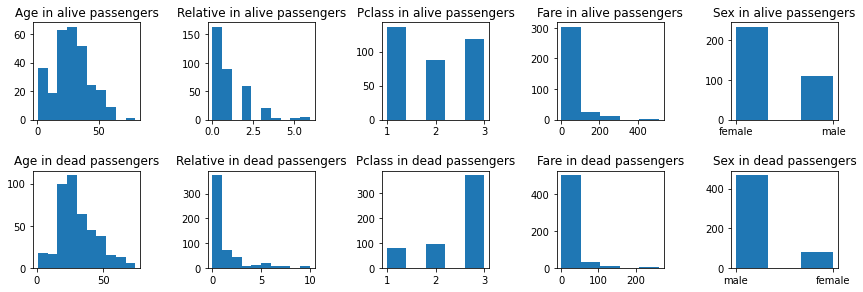

In [556]:
# Data analysis on train data bwtween the alive passengers and dead passengers
df_train['Relative'] = df_train['SibSp'] + df_train['Parch']
df_train_alive = df_train[df_train.Survived == 1]
df_train_dead = df_train[df_train.Survived == 0]

fig, axs = plt.subplots(2, 5, figsize=(12,4))
fig.tight_layout(w_pad=3.0, h_pad = 3.0)

axs[0, 0].hist(df_train_alive['Age'], bins=10)
axs[0, 0].set_title('Age in alive passengers') 
axs[1, 0].hist(df_train_dead['Age'], bins=10)
axs[1, 0].set_title('Age in dead passengers')

axs[0, 1].hist(df_train_alive['Relative'], bins=10)
axs[0, 1].set_title('Relative in alive passengers') 
axs[1, 1].hist(df_train_dead['Relative'], bins=10)
axs[1, 1].set_title('Relative in dead passengers') 

axs[0, 2].hist(df_train_alive['Pclass'], bins=5)
axs[0, 2].set_title('Pclass in alive passengers')
axs[1, 2].hist(df_train_dead['Pclass'], bins=5)
axs[1, 2].set_title('Pclass in dead passengers')

axs[0, 3].hist(df_train_alive['Fare'], bins=5)
axs[0, 3].set_title('Fare in alive passengers') 
axs[1, 3].hist(df_train_dead['Fare'], bins=5)
axs[1, 3].set_title('Fare in dead passengers')

axs[0, 4].hist(df_train_alive['Sex'], bins=3)
axs[0, 4].set_title('Sex in alive passengers') 
axs[1, 4].hist(df_train_dead['Sex'], bins=3)
axs[1, 4].set_title('Sex in dead passengers')

# Modeling

**1. Describe the chosen model and why choose this one. [5 points]**

I used logistic regression model, since the titanic problem is a binary classification, and usually we use logistic regression to perform binary classification problems.

In [557]:
from sklearn.linear_model import LogisticRegression
y_train = df_train_processed['Survived']
x_train = df_train_processed['data'].tolist()
clf = LogisticRegression().fit(x_train, y_train)

# the accuracy rate of the train data
clf.score(x_train, y_train)

0.8047138047138047

In [558]:
# use trained logistic model to predict the result of test data
x_test = df_test_processed['data'].tolist()
y_pred_test=clf.predict(x_test)
df_test_processed['Survived'] = y_pred_test
df_test_processed.head()

,PassengerId,Pclass,Sex,Age,Fare,Relative,data,Survived
0,892,3,0,34.5,7.8292,0,"[0.8273772438659676, -0.7376951317802897, 0.16...",0
1,893,3,1,47.0,7.0000,1,"[0.8273772438659676, 1.3555735383351184, 1.063...",0
2,894,2,0,62.0,9.6875,0,"[-0.3693648410115927, -0.7376951317802897, 2.1...",0
3,895,3,0,27.0,8.6625,0,"[0.8273772438659676, -0.7376951317802897, -0.3...",0
4,896,3,1,22.0,12.2875,2,"[0.8273772438659676, 1.3555735383351184, -0.73...",1


In [559]:
# create a new dataframe which only includes `PassengerId` and `Survived`
# then download it as submission
df_test_result = pd.DataFrame()
df_test_result['PassengerId'] = df_test_processed['PassengerId']
df_test_result['Survived'] = df_test_processed['Survived']
df_test_result.to_csv('Titanic_result.csv', index=False)
df_test_result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


**2. Describe how the chosen features in 1.2 is involved in the chosen model. [5 points]** 

I use five features: `Pclass`, `Sex`, `Age`, `Fare`, and `Relative` in the train data and test data. According the EDA analysis above: female are more likely to susvive than male, people in first class or second class are more likely to susvive than people in third class, children are more likely to susvive than other people, people with more relatives are more likely to susvive than other people, people with higher fare more likely to susvive than people with lower fare.



**3. Describe the loss function that will be used to estimate the model's parameters. [5 points]** 

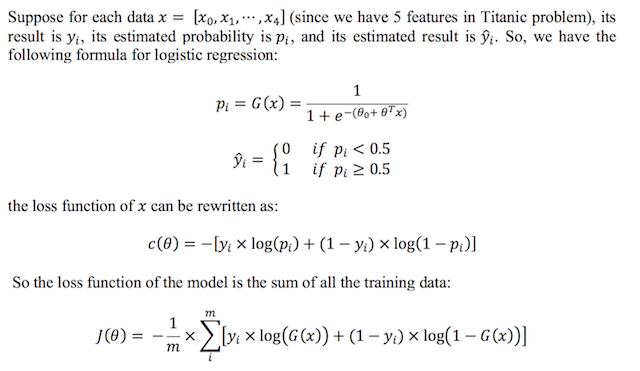

**4. Use a specific way (different ways have been discussed in A3) to estimate the model's parameters. [5 points]**

In [560]:
print(clf.coef_)
print(clf.intercept_)

[[-0.83975214  1.31589645 -0.47544826  0.15788641 -0.39594396]]
[-0.63260817]


**5. Use the model estimated to conduct a submission to the Kaggle competition and screenshot your leaderboard position. [5 points]** 

I got the accuracy rate of 76.076%, and was ranked 313th.

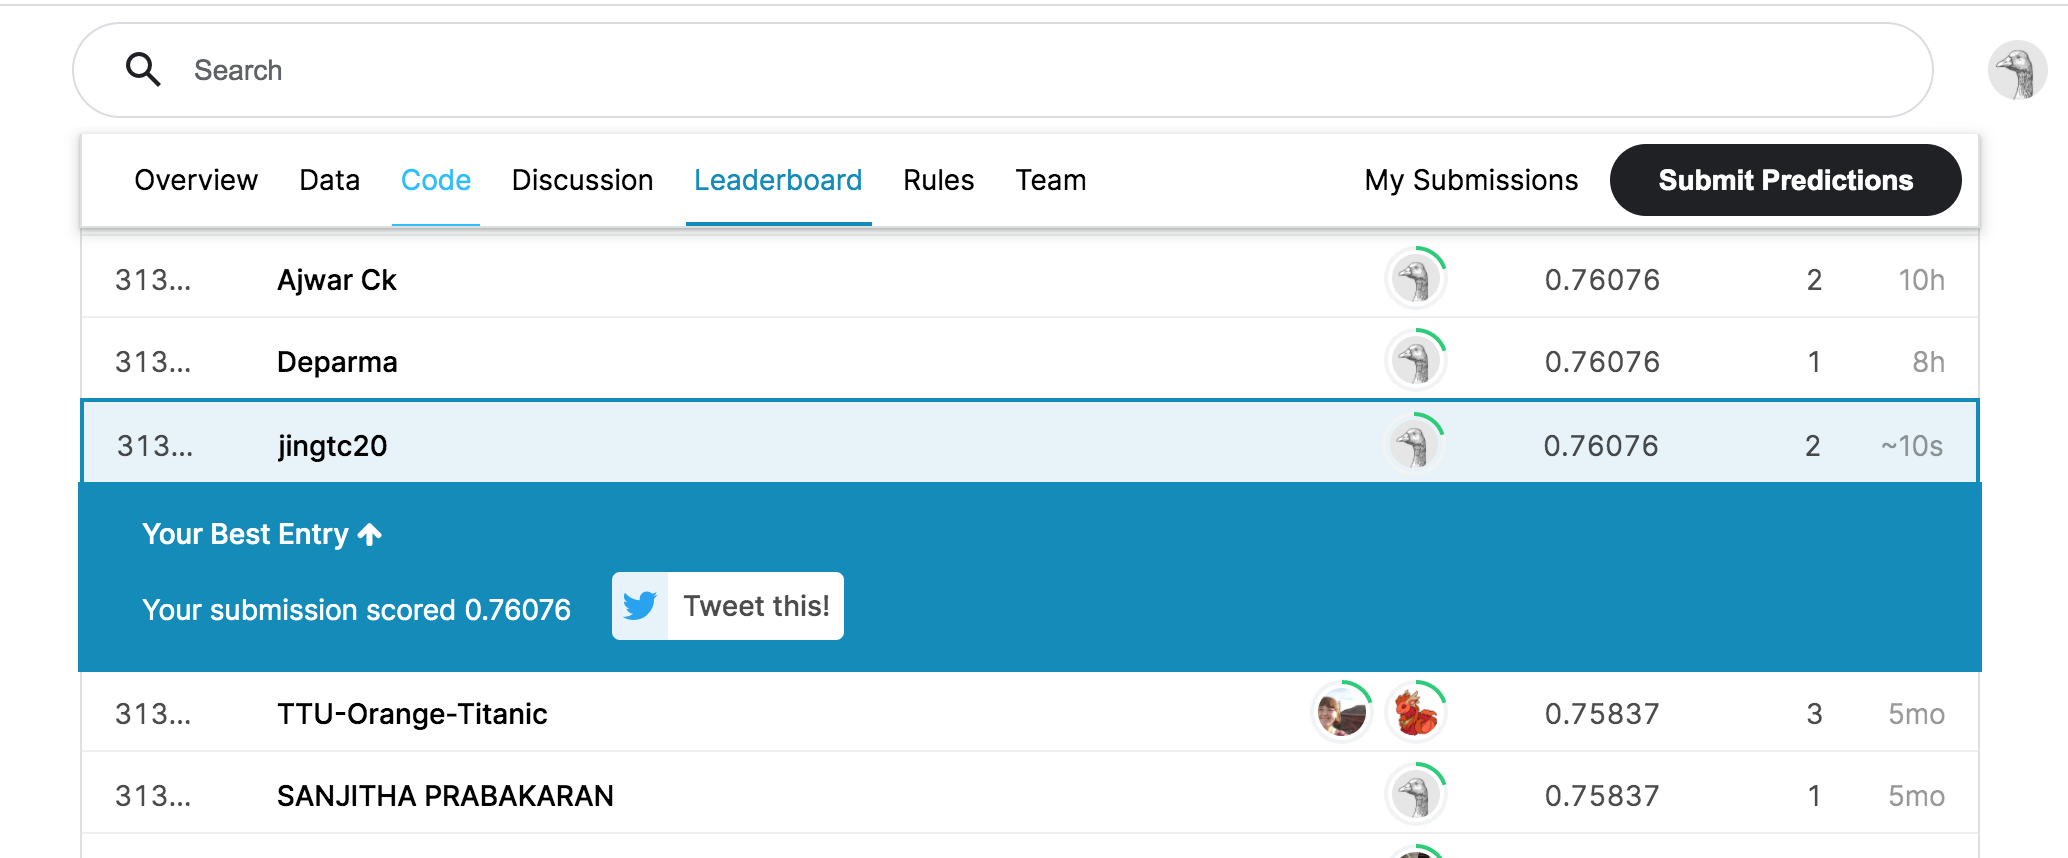